# Simulating the Traffic Signal Control System with two intersections

The layout is intersection 2 to the south of intersection 1.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Parameter definition

In [114]:
# Define parameters
# Velocity of traffic flow (m/s) which is average velocity of vehicle on the flow
v = {"w1": 15, "n1": 12, "21": 10, "e1": 15, "w2": 15, "n2": 12, "12": 10, "s2": 15}
# Name of parameters ... unknown
beta = {"w1": 0.8, "n1": 0.7, "21": 0.6, "e1": 0.8, "w2": 0.8, "n2": 0.7, "12": 0.6, "s2": 0.8}
# Disturbance -  external inflows for each approach
d = {"w1": 5, "n1": 3, "21": 4, "e1": 4, "w2": 3, "n2": 4, "12": 3, "s2": 4}

## Initial state

In [115]:
# Define initial densities for each link
initial_rho = [5, 5, 5, 5, 5, 5, 5, 5]  # rho_w1, rho_n1, rho_21, rho_e1, rho_w2, rho_n2, rho_12, rho_s2

## Time span

In [148]:
# Time and control settings (seconds)
time_span = (0, 100) # 100 seconds = 5 minutes
time_eval = np.linspace(0, 100, 50) # each phase length last 10 seconds 
control_step = 10  # each phase length last 10 seconds 

In [149]:
# Define a random control function
def random_control(t):
    phase1 = (np.random.choice([0, 1]) == 1)  # Randomly choose between Phase 1 and Phase 2
    delta = {
        "w1": 1 if not phase1 else 0,
        "n1": 1 if phase1 else 0,
        "21": 1 if phase1 else 0,
        "e1": 1 if not phase1 else 0,
        "w2": 1 if not phase1 else 0,
        "n2": 1 if phase1 else 0,
        "12": 1 if phase1 else 0,
        "s2": 1 if not phase1 else 0,
    }
    return delta

In [150]:
delta_w1_history = {"time": [], "value": []}

In [151]:
# Traffic dynamics with control
def traffic_dynamics(t, rho):
    # Get current control settings based on time
    if int(t) % control_step == 0:
        global current_delta
        current_delta = random_control(t)
        
        # Store only delta["w1"] in delta_w1_history
        delta_w1_history["time"].append(t)
        delta_w1_history["value"].append(current_delta["w1"])
        
    delta = current_delta
    
    

    # Unpack densities
    rho_w1, rho_n1, rho_21, rho_e1, rho_w2, rho_n2, rho_12, rho_s2 = rho
    
    # Outflow calculations
    q_w1 = rho_w1 * v["w1"] * beta["w1"] 
    q_n1 = rho_n1 * v["n1"] * beta["n1"]
    q_21 = rho_21 * v["21"] * beta["21"]
    q_e1 = rho_e1 * v["e1"] * beta["e1"]
    q_w2 = rho_w2 * v["w2"] * beta["w2"]
    q_n2 = rho_n2 * v["n2"] * beta["n2"]
    q_12 = rho_12 * v["12"] * beta["12"]
    q_s2 = rho_s2 * v["s2"] * beta["s2"]
    
    # Differential equations for each density
    drho_w1_dt = d["w1"] - delta["w1"] * q_w1
    drho_n1_dt = d["n1"] - delta["n1"] * q_n1
    drho_21_dt = d["21"] - delta["21"] * q_21
    drho_e1_dt = d["e1"] - delta["e1"] * q_e1
    drho_w2_dt = d["w2"] - delta["w2"] * q_w2
    drho_n2_dt = d["n2"] - delta["n2"] * q_n2
    drho_12_dt = d["12"] - delta["12"] * q_12
    drho_s2_dt = d["s2"] - delta["s2"] * q_s2
    
    # Return the derivatives
    return [
        drho_w1_dt, drho_n1_dt, drho_21_dt, drho_e1_dt,
        drho_w2_dt, drho_n2_dt, drho_12_dt, drho_s2_dt
    ]

In [152]:
# Solve the differential equations
current_delta = random_control(0)  # Initialize with a random control phase
solution = solve_ivp(traffic_dynamics, time_span, initial_rho, t_eval=time_eval)

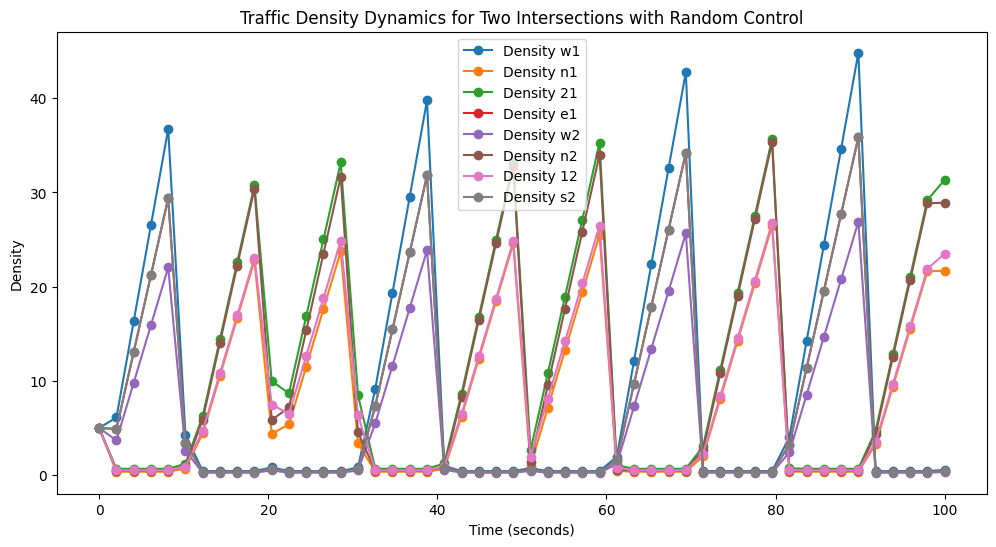

In [153]:
# Plot the densities over time for each link
plt.figure(figsize=(12, 6))
for i, label in enumerate(["w1", "n1", "21", "e1", "w2", "n2", "12", "s2"]):
    plt.plot(solution.t, solution.y[i], label=f"Density {label}", marker = 'o')
plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.legend()
plt.title("Traffic Density Dynamics for Two Intersections with Random Control")
plt.show()

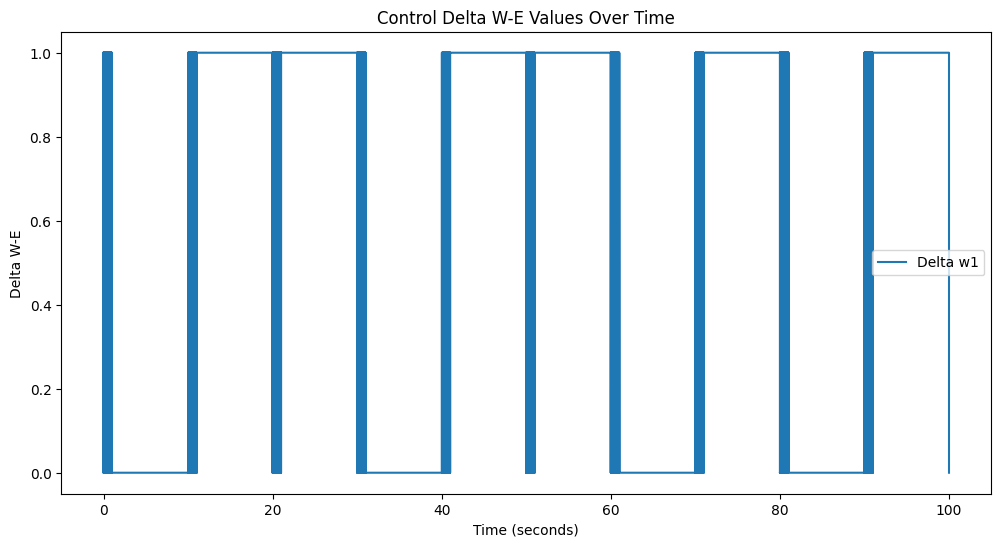

In [154]:
# Plot delta_w1 values over time
plt.figure(figsize=(12, 6))
plt.step(delta_w1_history["time"], delta_w1_history["value"], where='post', label="Delta w1")

plt.xlabel("Time (seconds)")
plt.ylabel("Delta W-E")
plt.legend()
plt.title("Control Delta W-E Values Over Time")
plt.show()